# Entrega 1 – Análise e Predição de Rendimento Agrícola

Nesta entrega, o objetivo foi analisar uma base de dados de rendimento de plantações, identificar padrões e outliers por meio de clusterização, e construir cinco modelos preditivos distintos para estimar o rendimento da safra, conforme o enunciado proposto.

---

In [19]:
!pip install numpy scikit-learn matplotlib pandas seaborn pycaret


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import numpy as np
from sklearn.cluster import HDBSCAN
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from pycaret.regression import *

# 1. Análise Exploratória dos Dados

A análise exploratória foi realizada para compreender a estrutura e as características dos dados. Foram utilizadas amostragens, visualização das colunas, inspeção do shape do DataFrame, além de gráficos de dispersão (pairplot) e boxplots para identificar padrões, relações entre variáveis e possíveis valores discrepantes (outliers).

---

In [21]:
df = pd.read_csv("crop_yield.csv")
df.sample(10)

,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
69,Oil palm fruit,2938.29,18.22,85.42,26.06,185831
19,"Cocoa, beans",2751.24,18.31,85.98,26.02,9274
49,Oil palm fruit,2217.12,18.03,84.39,26.10,150428
153,"Rubber, natural",2967.41,18.67,85.48,26.46,6842
35,"Cocoa, beans",2410.13,18.58,83.45,26.81,11487
133,"Rubber, natural",1999.53,18.20,84.36,26.27,6008
76,Oil palm fruit,2333.46,18.50,84.85,26.43,189657
134,"Rubber, natural",2362.80,18.70,84.03,26.79,5693
0,"Cocoa, beans",2248.92,17.72,83.40,26.01,11560
140,"Rubber, natural",2424.55,18.28,85.16,26.18,9139


In [22]:
df.columns

Index(['Crop', 'Precipitation (mm day-1)',
       'Specific Humidity at 2 Meters (g/kg)',
       'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)',
       'Yield'],
      dtype='object')

In [23]:
df.shape

(156, 6)

In [24]:
df_classes = df.drop(["Yield"], axis=1)

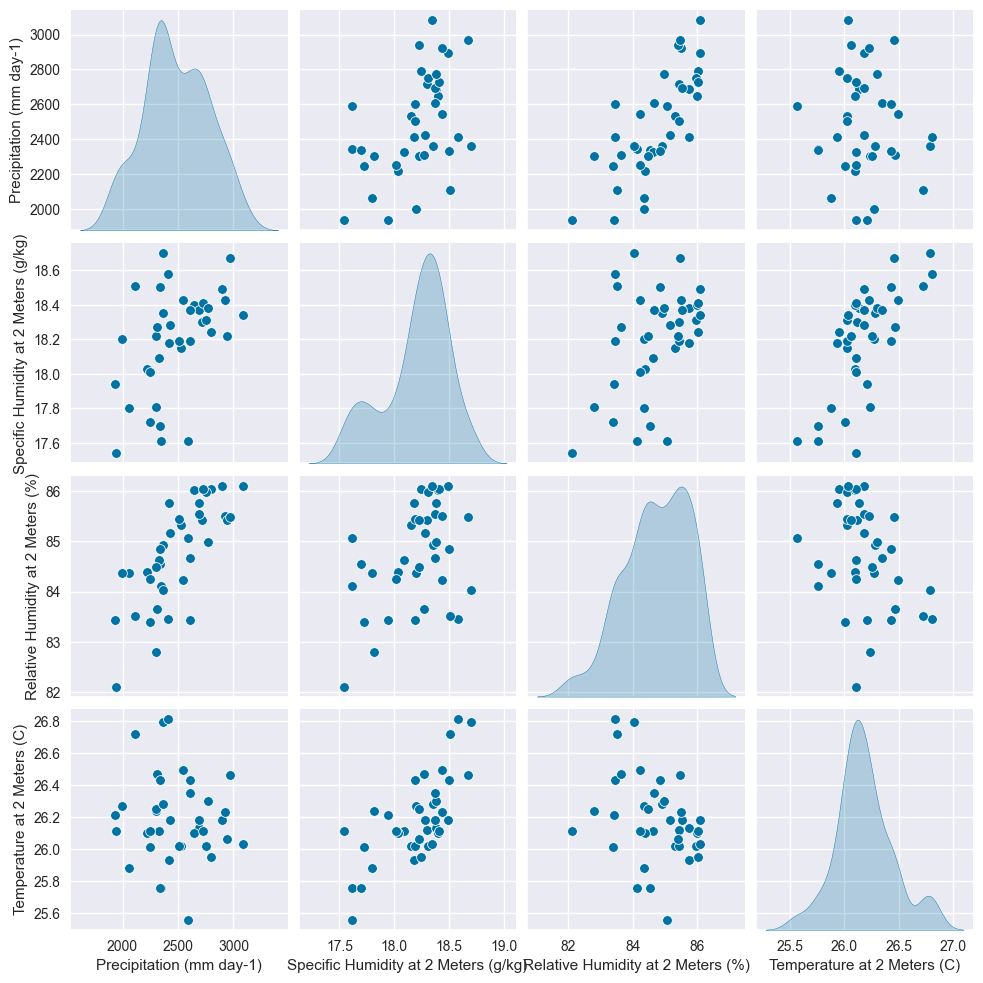

In [25]:
sns.pairplot(df_classes, diag_kind="kde")

<Axes: >

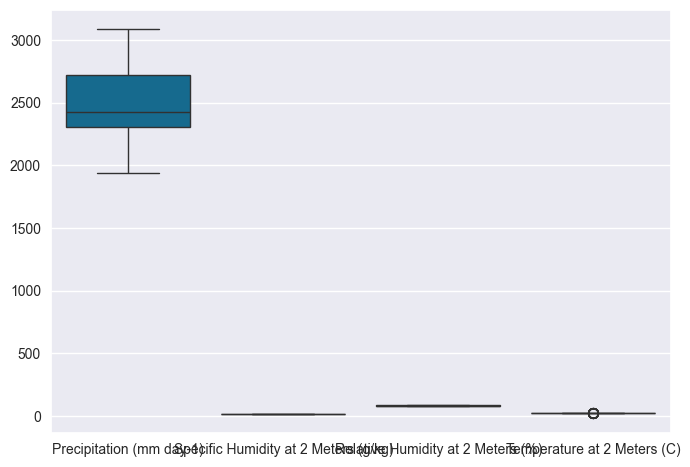

In [26]:
#BoxPlot
sns.boxplot(data=df_classes)

# 2. Clusterização e Identificação de Outliers

Para encontrar tendências nos rendimentos e identificar cenários discrepantes, foi aplicada a técnica de clusterização HDBSCAN sobre as variáveis numéricas. Os clusters foram visualizados em gráficos, permitindo observar agrupamentos naturais e possíveis outliers, atendendo ao requisito de análise de cenários discrepantes.

---

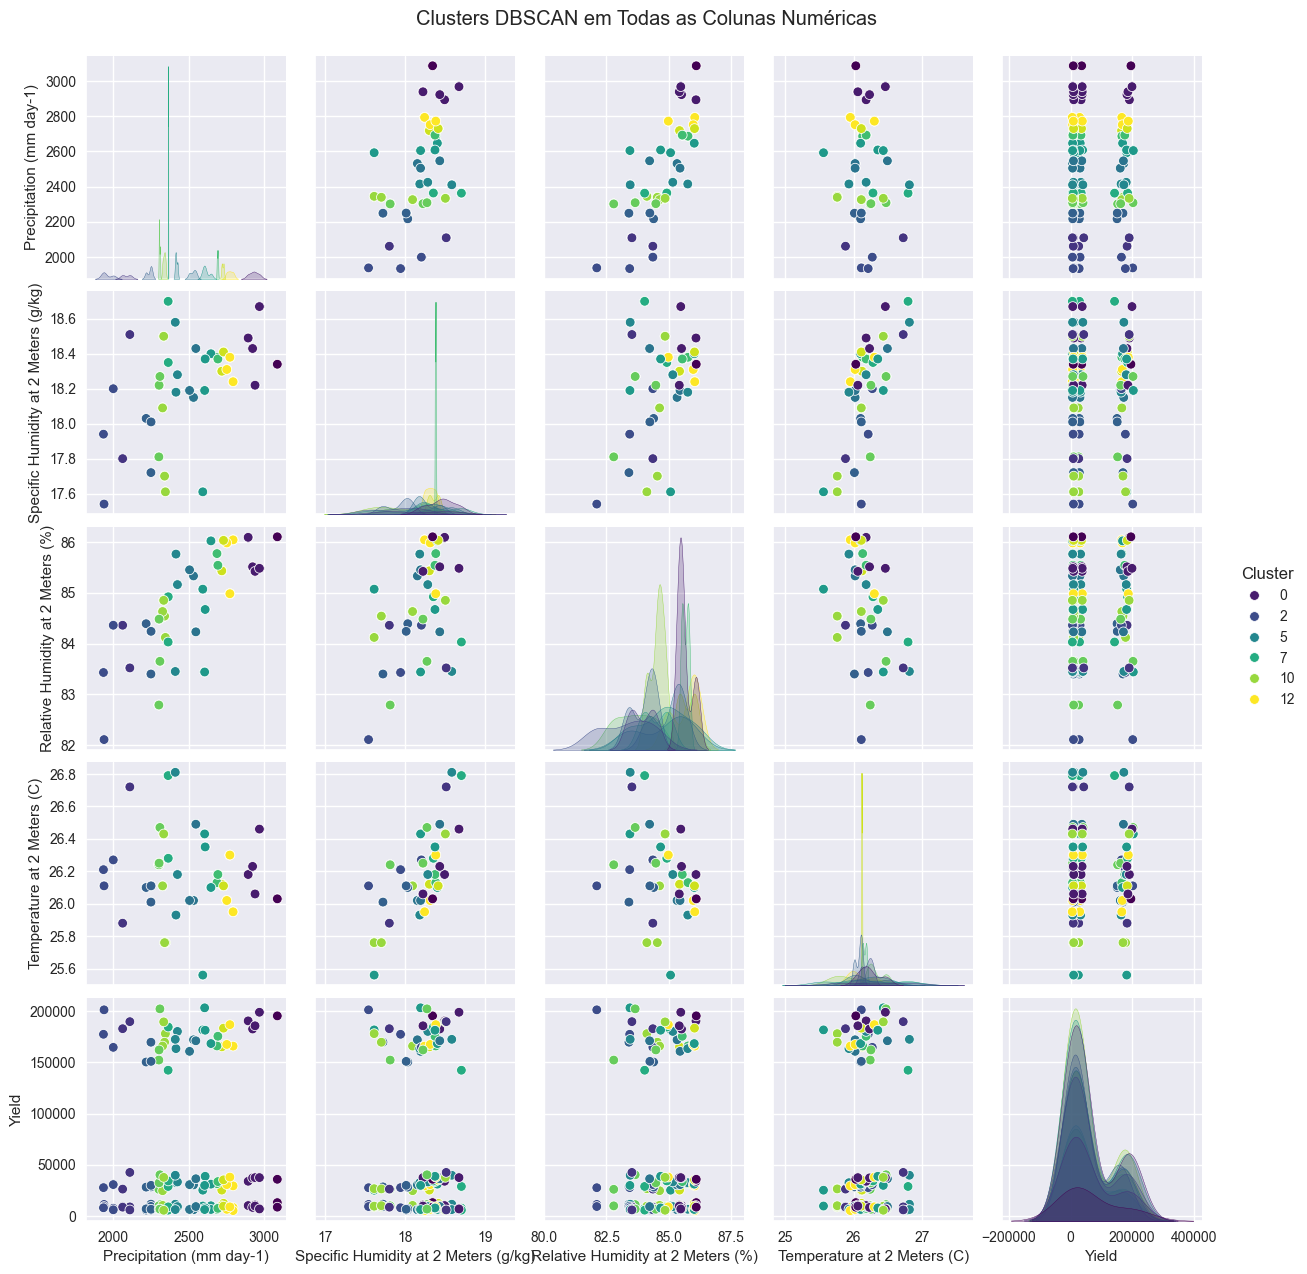

In [27]:
#Identificação de outliers com DBSCAN
X = df_classes.select_dtypes(include=np.number)  # Seleciona apenas colunas numéricas
dbscan = HDBSCAN(min_cluster_size=5, min_samples=3)

labels = dbscan.fit_predict(X)

# Adiciona os rótulos dos clusters ao DataFrame
df_clusters = df.copy()
df_clusters['Cluster'] = labels

# Faz o pairplot colorindo pelos clusters
sns.pairplot(df_clusters, hue='Cluster', diag_kind='kde', palette='viridis')
plt.suptitle('Clusters DBSCAN em Todas as Colunas Numéricas', y=1.02)
plt.show()

# 3. Modelagem Preditiva com Cinco Algoritmos Diferentes

Foram desenvolvidos cinco modelos preditivos distintos utilizando diferentes algoritmos de regressão, conforme solicitado. O PyCaret foi utilizado para automatizar o pré-processamento, seleção, treinamento e avaliação dos modelos. As métricas de desempenho (R², RMSE, MAE) foram calculadas para cada modelo, e gráficos de erro e importância de variáveis foram gerados para análise dos resultados.

---

In [28]:
# Divisão de treino e teste
train, test = train_test_split(df,
                               test_size=0.2,
                               random_state=42)
# IMPORTANTE: o pycaret sempre começa com o setup()
reg = setup(data=train,         # Dados para treino
            target="Yield",   # Label a ser predito
            train_size=0.7)     # Proporção de dados para treino (o resto é validação)

,Description,Value
0,Session id,3922
1,Target,Yield
2,Target type,Regression
3,Original data shape,"(124, 6)"
4,Transformed data shape,"(124, 9)"
5,Transformed train set shape,"(86, 9)"
6,Transformed test set shape,"(38, 9)"
7,Numeric features,4
8,Categorical features,1
9,Preprocess,True


# 4. Seleção dos 5 melhores modelos treinados utilizando o PyCaret pelo R2 score.
Abaixo faremos um comparativo e seleção dos 5 melhores modelos treinados utilizando o PyCaret


In [29]:
# Agora vamos comparar diversos modelos de regressão
compare_models(sort="R2")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,4675.3642,66008370.8204,7115.3080,0.8959,0.1533,0.1274,0.0160
ada,AdaBoost Regressor,5172.6899,88494510.4368,8066.6532,0.8915,0.1609,0.1339,0.0090
et,Extra Trees Regressor,4349.3067,62940340.6398,6939.0676,0.8843,0.1528,0.1230,0.0150
gbr,Gradient Boosting Regressor,4485.8151,57666548.9478,6656.3830,0.8766,0.1747,0.1430,0.0080
dt,Decision Tree Regressor,5442.0000,121848823.4806,8908.8668,0.8066,0.2043,0.1633,0.0060
lasso,Lasso Regression,5712.1734,72067592.2036,7844.5560,0.7325,0.2608,0.1922,0.1410
llar,Lasso Least Angle Regression,5872.2649,77103970.6023,8076.6218,0.7082,0.2876,0.1989,0.0050
lr,Linear Regression,6006.5709,80612672.3159,8242.0873,0.6603,0.3188,0.2076,0.0220
lar,Least Angle Regression,12926.2588,347375985.8904,16118.7301,0.6154,0.6417,0.6664,0.0050
ridge,Ridge Regression,6066.7039,80965576.9875,8187.8296,0.5757,0.2709,0.2461,0.1040


RandomForestRegressor(n_jobs=-1, random_state=3922)

# 4. Análise dos melhores modelos treinados acima utilizando o PyCaret*

In [30]:
# Seleciona os 5 melhores modelos
top5_models = compare_models(n_select=5, sort='R2')

# Avalia cada modelo no conjunto de teste
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


top5_models_results = []

for i, model in enumerate(top5_models, 1):
    print(f"Modelo {i}: {model}")
    # Cria modelo treinado
    final_model = finalize_model(model)
    # Faz predições no conjunto de teste
    predictions = predict_model(final_model, data=test)
    y_true = test['Yield']
    y_pred = predictions['Yield']
    # Calcula métricas
    r2 = r2_score(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mae = mean_absolute_error(y_true, y_pred)

    top5_models_results.append(model)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,4675.3642,66008370.8204,7115.3080,0.8959,0.1533,0.1274,0.0160
ada,AdaBoost Regressor,5172.6899,88494510.4368,8066.6532,0.8915,0.1609,0.1339,0.0100
et,Extra Trees Regressor,4349.3067,62940340.6398,6939.0676,0.8843,0.1528,0.1230,0.0140
gbr,Gradient Boosting Regressor,4485.8151,57666548.9478,6656.3830,0.8766,0.1747,0.1430,0.0090
dt,Decision Tree Regressor,5442.0000,121848823.4806,8908.8668,0.8066,0.2043,0.1633,0.0050
lasso,Lasso Regression,5712.1734,72067592.2036,7844.5560,0.7325,0.2608,0.1922,0.0050
llar,Lasso Least Angle Regression,5872.2649,77103970.6023,8076.6218,0.7082,0.2876,0.1989,0.0050
lr,Linear Regression,6006.5709,80612672.3159,8242.0873,0.6603,0.3188,0.2076,0.0050
lar,Least Angle Regression,12926.2588,347375985.8904,16118.7301,0.6154,0.6417,0.6664,0.0050
ridge,Ridge Regression,6066.7039,80965576.9875,8187.8296,0.5757,0.2709,0.2461,0.0050


Modelo 1: RandomForestRegressor(n_jobs=-1, random_state=3922)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,2766.5706,26728139.5852,5169.9265,0.9931,0.1034,0.0720


Modelo 2: AdaBoostRegressor(random_state=3922)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,AdaBoost Regressor,2067.6525,10037971.3270,3168.2758,0.9974,0.1182,0.0902


Modelo 3: ExtraTreesRegressor(n_jobs=-1, random_state=3922)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,2544.1178,14516499.4598,3810.0524,0.9963,0.1037,0.0796


Modelo 4: GradientBoostingRegressor(random_state=3922)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,3083.1117,36896374.5135,6074.2386,0.9905,0.1359,0.0988


Modelo 5: DecisionTreeRegressor(random_state=3922)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,2800.6562,22793260.4062,4774.2288,0.9941,0.1685,0.1027


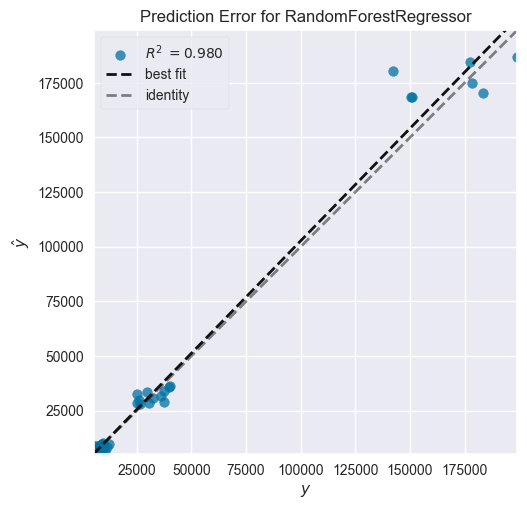

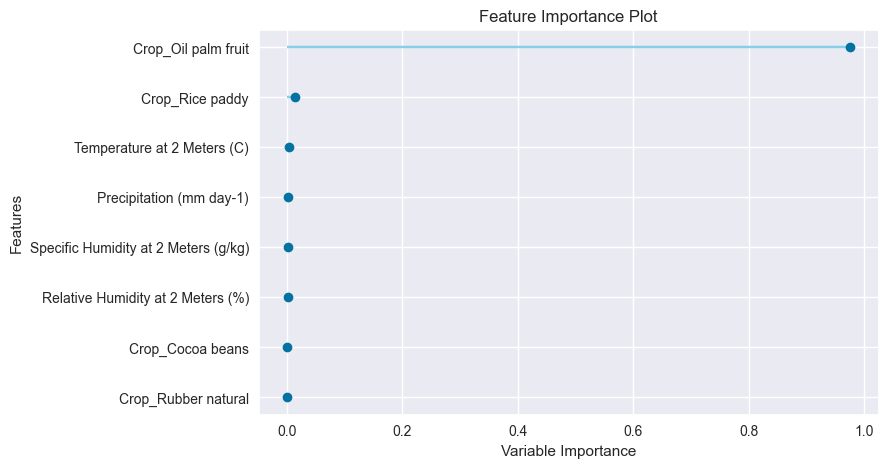

In [31]:

plot_model(top5_models_results[0], plot="error")
plot_model(top5_models_results[0], plot="feature")

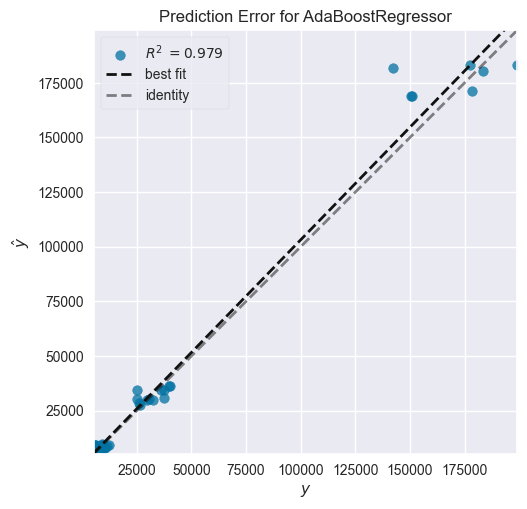

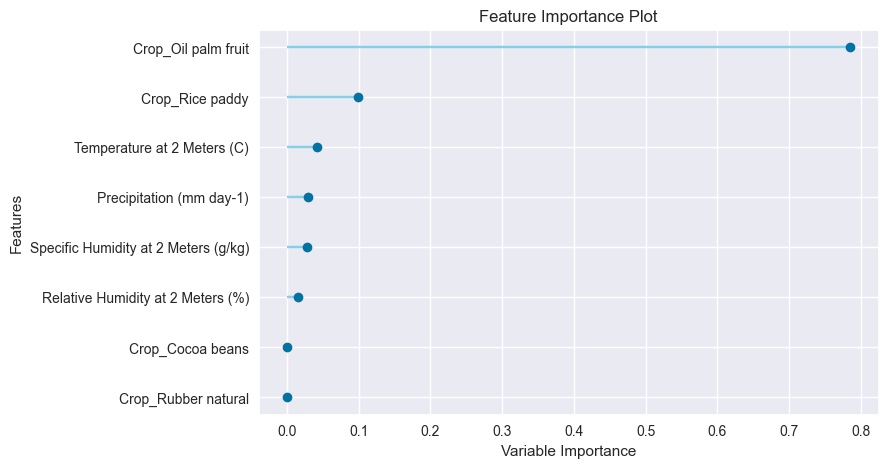

In [32]:
plot_model(top5_models_results[1], plot="error")
plot_model(top5_models_results[1], plot="feature")

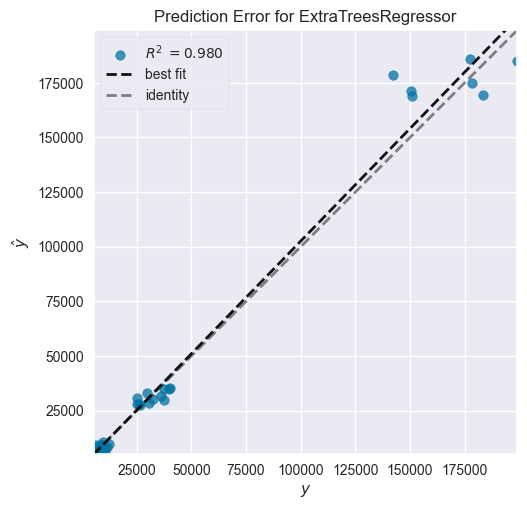

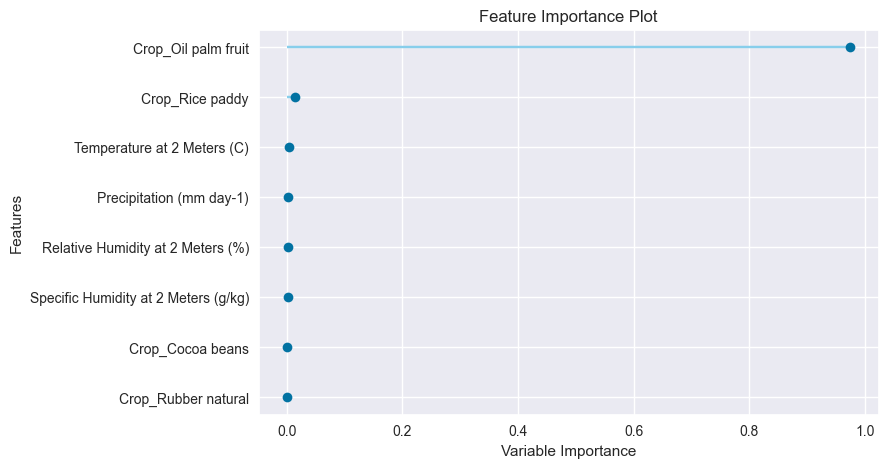

In [33]:
plot_model(top5_models_results[2], plot="error")
plot_model(top5_models_results[2], plot="feature")

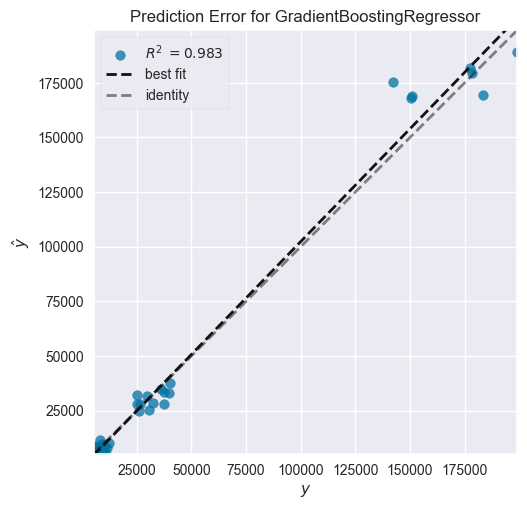

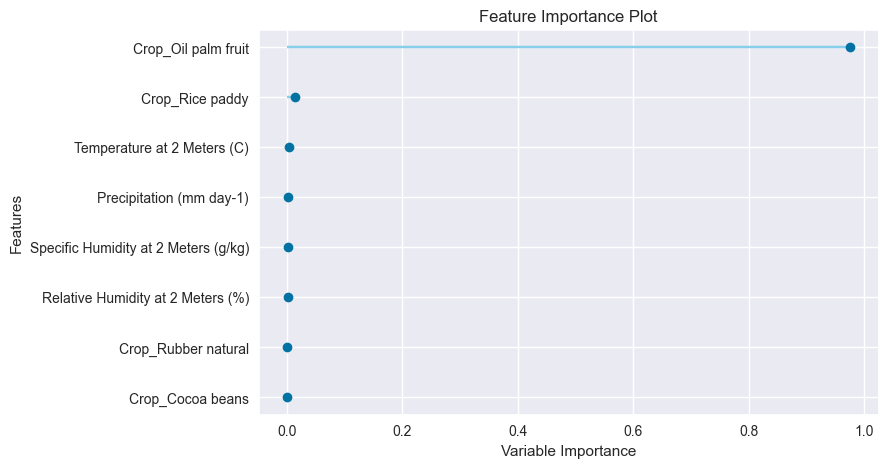

In [34]:
plot_model(top5_models_results[3], plot="error")
plot_model(top5_models_results[3], plot="feature")

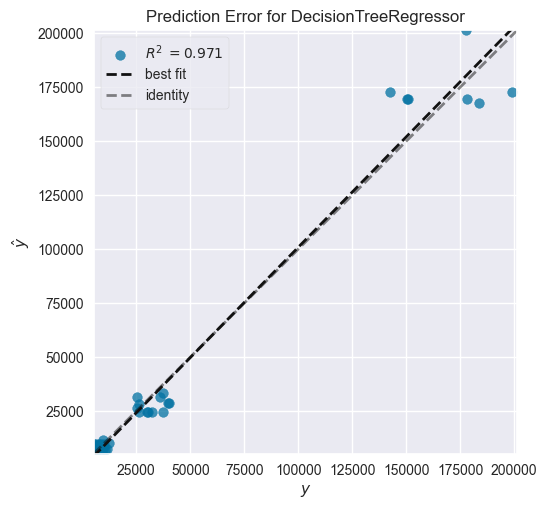

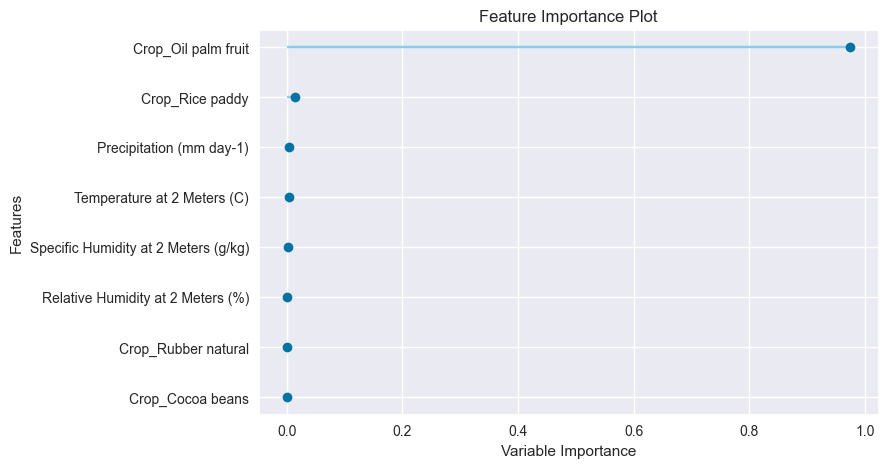

In [35]:
plot_model(top5_models_results[4], plot="error")
plot_model(top5_models_results[4], plot="feature")

In [36]:
#Salvando os modelos
import os
import joblib

caminho = "top_models"

if  not os.path.exists(caminho):
    os.makedirs(caminho)

for model in top5_models:
    joblib.dump(model, os.path.join(caminho, f"{model}.pkl"))



# 5. Conclusão

Diante da proposta apresentada, conclui-se que a tarefa envolveu um fluxo completo de ciência de dados aplicado ao contexto agrícola. Inicialmente, a análise exploratória foi fundamental para compreender a base, suas variáveis e possíveis inconsistências. Em seguida, a utilização do algoritmo HDBSCAN para clusterização possibilitou identificar padrões nos rendimentos das plantações, além de destacar cenários discrepantes (outliers) de forma eficiente. Já na etapa de modelagem, o uso do PyCaret trouxe facilidades importantes, automatizando processos como o treinamento, comparação e avaliação de múltiplos algoritmos preditivos. Dessa forma, a construção de cinco modelos distintos seguiu boas práticas de Machine Learning e permitiu selecionar abordagens mais robustas para a previsão da produtividade das safras, garantindo resultados mais consistentes e alinhados às necessidades do problema.
